# Prediction Using Logistic Regression

## Problem Statement


A car company has released a new SUV in the market. Using the previous data about the sales of their SUV’s, they want to predict the category of people who might be interested in buying this.



# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,roc_curve,auc

In [2]:
suv_data = pd.read_csv('suv_data.csv')
suv_data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
suv_data.shape

(400, 5)

In [4]:
suv_data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
suv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
suv_data.columns


Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

<AxesSubplot:xlabel='Purchased', ylabel='count'>

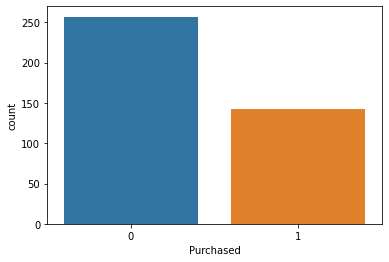

In [7]:
sns.countplot(x = 'Purchased',data = suv_data)

In [13]:
X = suv_data.iloc[:, [2,3]]

In [14]:
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [17]:
y = suv_data.iloc[:,4].values
print(y.shape)

(400,)


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25)

In [19]:
# We can also scale the input values for better performance using StandarScaler as shown below:
sc = StandardScaler()
 
X_train = sc.fit_transform(X_train)
 
X_test = sc.transform(X_test)

In [20]:
log = LogisticRegression()

In [21]:
log.fit(X_train,y_train)

LogisticRegression()

In [22]:
pred = log.predict(X_test)

In [23]:
pred

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [25]:
acc_score = accuracy_score(pred, y_test)
print("Accuracy Score:", acc_score)

Accuracy Score: 0.85


In [27]:
# Now, we can check how many predictions were accurate and how many were not using confusion matrix.

cm_lrc = confusion_matrix(pred, y_test)
cm_lrc

array([[65, 12],
       [ 3, 20]])

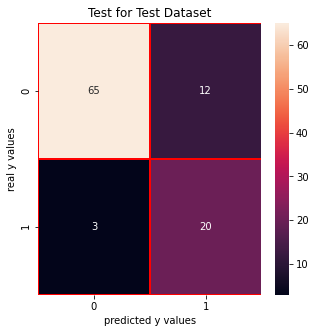

In [28]:
# cm visualization
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_lrc, annot = True, linewidths=0.5, linecolor="red", fmt = ".0f", ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

In [30]:
from sklearn.metrics import precision_score
print("precision_score: ", precision_score(y_test, pred))
print("recall_score: ", recall_score(y_test, pred))

from sklearn.metrics import f1_score
print("f1_score: ",f1_score(y_test, pred))

precision_score:  0.8695652173913043
recall_score:  0.625
f1_score:  0.7272727272727273


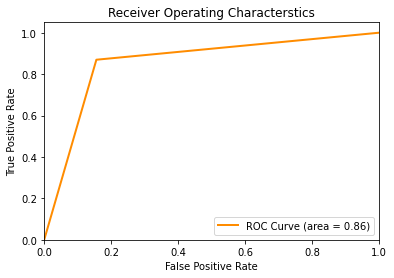

In [31]:
fpr, tpr, thresholds = roc_curve(pred, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color = 'darkorange', lw=2, label = 'ROC Curve (area = %0.2f)'% roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstics')
plt.legend(loc = 'lower right')
plt.show()

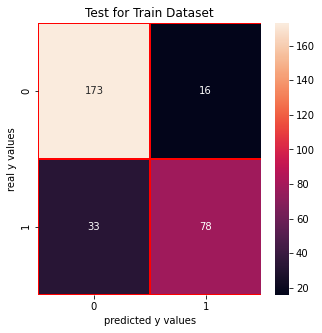

In [33]:
cm_lrc_train = confusion_matrix(y_train, log.predict(X_train))
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_lrc_train, annot = True, linewidths=0.5, linecolor="red", fmt = ".0f", ax=ax)
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.title("Test for Train Dataset")
plt.show()